In [16]:
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib ;  import matplotlib.pyplot as plt
# 데이터 시각화:추세, 산점도 행렬 
import seaborn as sns
import datetime as dt
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

bar_width = 0.35
alpha = 0.5

In [3]:
sales = pd.read_csv("B1_유통(BtoB)/01_sales_data.csv")
customer = pd.read_csv("B1_유통(BtoB)/02_customer_data.csv")
stock = pd.read_csv("B1_유통(BtoB)/03_stock_data.csv")

In [4]:
salesdata = pd.read_csv("whole_sale.csv")
salesdata

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,weekday,week
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,...,339,156,small,sightseeing,other,consignment,1,1,MON,1
1,1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,...,339,156,small,sightseeing,other,consignment,1,1,MON,1
2,2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,...,339,156,small,sightseeing,other,consignment,1,1,MON,1
3,3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,...,339,156,small,sightseeing,other,consignment,1,1,MON,1
4,4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,...,339,156,small,sightseeing,other,consignment,1,1,MON,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246164,252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,...,8177,778,big,metro,east,buying,12,4,THU,49
246165,252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,...,1598,1291,middle,other,south,buying,12,4,THU,49
246166,252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,...,1598,1291,middle,other,south,consignment,12,4,THU,49
246167,252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,...,1598,1291,middle,other,south,consignment,12,4,THU,49


In [164]:
df3= salesdata.groupby(['city'])['sales'].sum()
df3= pd.DataFrame(df3)

<AxesSubplot:xlabel='city'>

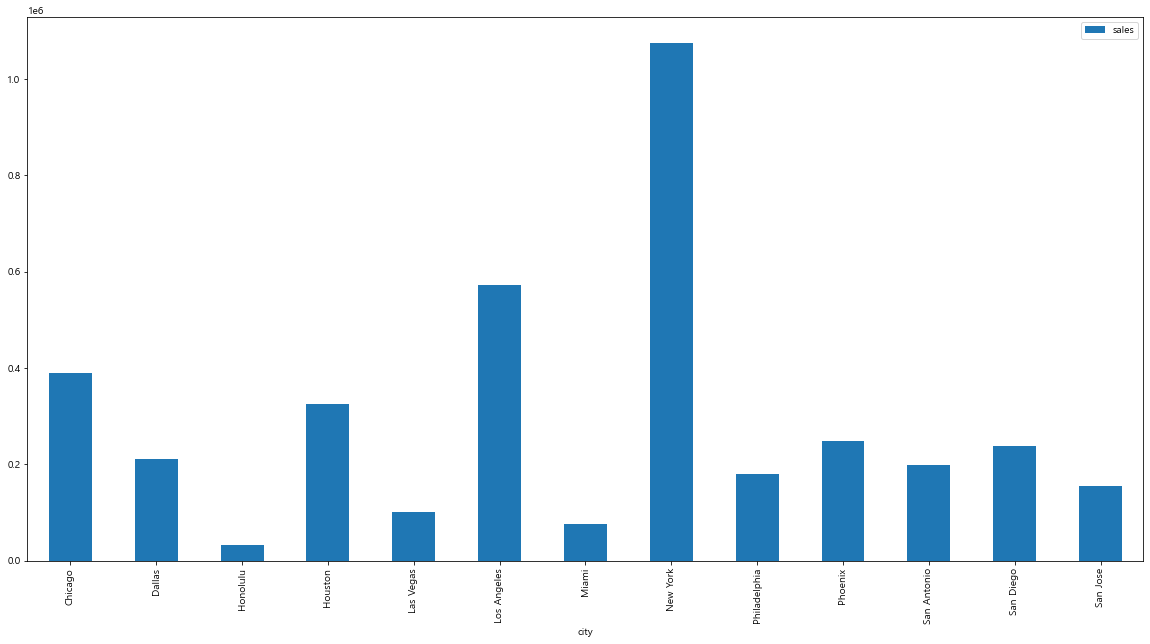

In [165]:
df3.plot.bar(figsize = (20,10))

In [166]:
df3 =df3.reset_index()
df3= df3.sort_values(by=['sales'])
df3 = df3.reset_index(drop=True)

In [167]:
df3

,city,sales
0,Honolulu,31970.660
1,Miami,75352.460
2,Las Vegas,99897.190
3,San Jose,155033.290
4,Philadelphia,180059.290
5,San Antonio,198082.840
6,Dallas,210605.130
7,San Diego,238599.980
8,Phoenix,248883.160
9,Houston,324497.060


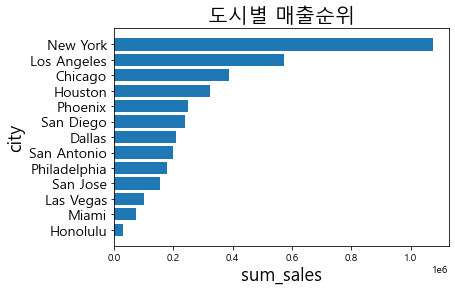

In [168]:
plt.barh(df3['city'], df3['sales'])
plt.title('도시별 매출순위', fontsize=20)
plt.xlabel('sum_sales', fontsize=18)
plt.ylabel('city', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [169]:
df5 = pd.merge(df3,customer, on=['city'],how ='left')
df5

,city,sales,customer_id,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn
0,Honolulu,31970.660,E13313,HI,339,156,small,sightseeing,other
1,Honolulu,31970.660,E12957,HI,339,156,small,sightseeing,other
2,Honolulu,31970.660,E13491,HI,339,156,small,sightseeing,other
3,Honolulu,31970.660,E14733,HI,339,156,small,sightseeing,other
4,Honolulu,31970.660,E16503,HI,339,156,small,sightseeing,other
...,...,...,...,...,...,...,...,...,...
3453,New York,1075139.482,E14578,NY,8177,778,big,metro,east
3454,New York,1075139.482,E14087,NY,8177,778,big,metro,east
3455,New York,1075139.482,E17590,NY,8177,778,big,metro,east
3456,New York,1075139.482,E15471,NY,8177,778,big,metro,east


In [170]:
df5['person_sale']= df5['sales']/df5['pop_thousand']
df5

,city,sales,customer_id,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,person_sale
0,Honolulu,31970.660,E13313,HI,339,156,small,sightseeing,other,94.308732
1,Honolulu,31970.660,E12957,HI,339,156,small,sightseeing,other,94.308732
2,Honolulu,31970.660,E13491,HI,339,156,small,sightseeing,other,94.308732
3,Honolulu,31970.660,E14733,HI,339,156,small,sightseeing,other,94.308732
4,Honolulu,31970.660,E16503,HI,339,156,small,sightseeing,other,94.308732
...,...,...,...,...,...,...,...,...,...,...
3453,New York,1075139.482,E14578,NY,8177,778,big,metro,east,131.483366
3454,New York,1075139.482,E14087,NY,8177,778,big,metro,east,131.483366
3455,New York,1075139.482,E17590,NY,8177,778,big,metro,east,131.483366
3456,New York,1075139.482,E15471,NY,8177,778,big,metro,east,131.483366


In [171]:
df5= df5[['city','person_sale']]
df5 = df5.drop_duplicates()
df5= df5.sort_values(by=['person_sale'])
df5 = df5.reset_index(drop=True)

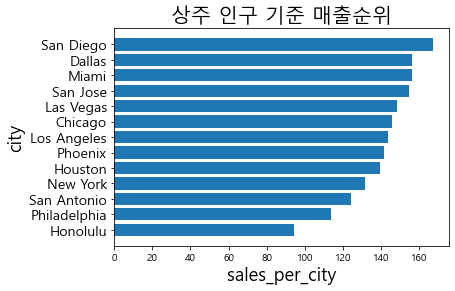

In [172]:
plt.barh(df5['city'], df5['person_sale'])
plt.title('상주 인구 기준 매출순위', fontsize=20)
plt.xlabel('sales_per_city', fontsize=18)
plt.ylabel('city', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [173]:
df3

,city,sales
0,Honolulu,31970.660
1,Miami,75352.460
2,Las Vegas,99897.190
3,San Jose,155033.290
4,Philadelphia,180059.290
5,San Antonio,198082.840
6,Dallas,210605.130
7,San Diego,238599.980
8,Phoenix,248883.160
9,Houston,324497.060


In [174]:
cus = salesdata[['city','customer_id']]

In [175]:
cus = cus.drop_duplicates()
cus

,city,customer_id
0,Honolulu,E13313
17,Houston,E18097
25,San Jose,E16656
28,Phoenix,E16875
50,New York,E17315
...,...,...
244084,Las Vegas,E14698
244343,San Diego,E13298
245051,New York,E14569
245156,Phoenix,E16688


In [176]:
cus = cus['city'].value_counts()

In [177]:
cus = pd.DataFrame(cus)
cus = cus.reset_index()
cus

,index,city
0,New York,975
1,Los Angeles,495
2,Chicago,339
3,Houston,269
4,Phoenix,224
5,San Antonio,201
6,San Diego,181
7,Dallas,179
8,Philadelphia,176
9,San Jose,133


In [178]:
cus.columns=['city','id_count']
cus

,city,id_count
0,New York,975
1,Los Angeles,495
2,Chicago,339
3,Houston,269
4,Phoenix,224
5,San Antonio,201
6,San Diego,181
7,Dallas,179
8,Philadelphia,176
9,San Jose,133


In [179]:
df6 = pd.merge(df3,cus, on=['city'],how ='left')
df6

,city,sales,id_count
0,Honolulu,31970.660,43
1,Miami,75352.460,56
2,Las Vegas,99897.190,85
3,San Jose,155033.290,133
4,Philadelphia,180059.290,176
5,San Antonio,198082.840,201
6,Dallas,210605.130,179
7,San Diego,238599.980,181
8,Phoenix,248883.160,224
9,Houston,324497.060,269


In [180]:
df6['cus_sale']= df6['sales']/df6['id_count']
df6= df6.sort_values(by=['cus_sale'])
df6 = df6.reset_index(drop=True)
df6

,city,sales,id_count,cus_sale
0,Honolulu,31970.660,43,743.503721
1,San Antonio,198082.840,201,985.486766
2,Philadelphia,180059.290,176,1023.064148
3,New York,1075139.482,975,1102.707161
4,Phoenix,248883.160,224,1111.085536
5,Chicago,388634.290,339,1146.413835
6,Los Angeles,572830.022,495,1157.232368
7,San Jose,155033.290,133,1165.663835
8,Las Vegas,99897.190,85,1175.261059
9,Dallas,210605.130,179,1176.564972


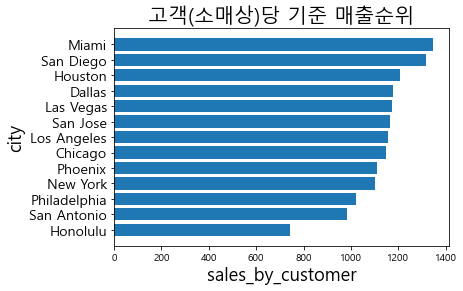

In [181]:
plt.barh(df6['city'], df6['cus_sale'])
plt.title('고객(소매상)당 기준 매출순위', fontsize=20)
plt.xlabel('sales_by_customer', fontsize=18)
plt.ylabel('city', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [182]:
sddata= salesdata[salesdata['city']=='San Diego']
sddata

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,weekday,week
98,102,540014,21654,RIDGED GLASS FINGER BOWL,1,2021-01-04,1.45,E14606,1.45,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
99,103,540014,84499,BLACK FLOWER CANDLE PLATE,6,2021-01-04,0.85,E14606,5.10,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
100,104,540014,21661,VINTAGE GLASS TEA CADDY,1,2021-01-04,5.95,E14606,5.95,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
101,105,540014,21703,BAG 125g SWIRLY MARBLES,3,2021-01-04,0.42,E14606,1.26,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
102,106,540014,22274,FELTCRAFT DOLL EMILY,1,2021-01-04,2.95,E14606,2.95,San Diego,...,1429,844,middle,sightseeing,west,buying,1,1,MON,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245649,252224,581469,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2021-12-08,4.95,E14606,4.95,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49
245650,252225,581469,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",1,2021-12-08,3.95,E14606,3.95,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49
245651,252226,581469,21986,PACK OF 12 PINK POLKADOT TISSUES,1,2021-12-08,0.39,E14606,0.39,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49
245652,252227,581469,22087,PAPER BUNTING WHITE LACE,6,2021-12-08,2.95,E14606,17.70,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49


In [183]:
sddata['product_name'].count()

14110

In [184]:
sddata = sddata['product_name'].value_counts().head(8)
sddata = pd.DataFrame(sddata)
sddata

,product_name
JUMBO BAG RED RETROSPOT,78
WHITE HANGING HEART T-LIGHT HOLDER,78
LUNCH BAG RED RETROSPOT,67
PARTY BUNTING,67
LUNCH BAG CARS BLUE,63
LUNCH BAG SUKI DESIGN,62
REGENCY CAKESTAND 3 TIER,59
JUMBO BAG PINK POLKADOT,58


In [185]:
sddata = sddata.reset_index()
sddata.columns=['product','pd_count']
sddata

,product,pd_count
0,JUMBO BAG RED RETROSPOT,78
1,WHITE HANGING HEART T-LIGHT HOLDER,78
2,LUNCH BAG RED RETROSPOT,67
3,PARTY BUNTING,67
4,LUNCH BAG CARS BLUE,63
5,LUNCH BAG SUKI DESIGN,62
6,REGENCY CAKESTAND 3 TIER,59
7,JUMBO BAG PINK POLKADOT,58


In [186]:
sddata['pd_count'].sum()

532

In [187]:
sddata['pct_pd_count']= sddata['pd_count']/532*100
sddata

,product,pd_count,pct_pd_count
0,JUMBO BAG RED RETROSPOT,78,14.661654
1,WHITE HANGING HEART T-LIGHT HOLDER,78,14.661654
2,LUNCH BAG RED RETROSPOT,67,12.593985
3,PARTY BUNTING,67,12.593985
4,LUNCH BAG CARS BLUE,63,11.842105
5,LUNCH BAG SUKI DESIGN,62,11.654135
6,REGENCY CAKESTAND 3 TIER,59,11.090226
7,JUMBO BAG PINK POLKADOT,58,10.902256


In [188]:
aldata = salesdata['product_name'].value_counts().head(8)


In [189]:
aldata = aldata.reset_index()
aldata.columns=['product','pd_count']
aldata

,product,pd_count
0,WHITE HANGING HEART T-LIGHT HOLDER,1396
1,PARTY BUNTING,1152
2,REGENCY CAKESTAND 3 TIER,1107
3,JUMBO BAG RED RETROSPOT,980
4,ASSORTED COLOUR BIRD ORNAMENT,942
5,LUNCH BAG RED RETROSPOT,896
6,SET OF 3 CAKE TINS PANTRY DESIGN,822
7,SPOTTY BUNTING,801


In [190]:
aldata['pd_count'].sum()

8096

In [191]:
aldata['pct_pd_count']= aldata['pd_count']/8096*100
aldata

,product,pd_count,pct_pd_count
0,WHITE HANGING HEART T-LIGHT HOLDER,1396,17.243083
1,PARTY BUNTING,1152,14.229249
2,REGENCY CAKESTAND 3 TIER,1107,13.673419
3,JUMBO BAG RED RETROSPOT,980,12.104743
4,ASSORTED COLOUR BIRD ORNAMENT,942,11.635375
5,LUNCH BAG RED RETROSPOT,896,11.067194
6,SET OF 3 CAKE TINS PANTRY DESIGN,822,10.153162
7,SPOTTY BUNTING,801,9.893775


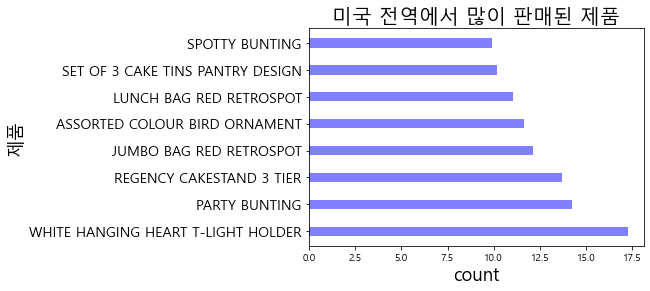

In [196]:
bar_width = 0.35
alpha = 0.5
p1 = plt.barh(aldata['product'], aldata['pct_pd_count'],
             bar_width,
             color='b',
             alpha=alpha,
             label='All')

plt.title('미국 전역에서 많이 판매된 제품', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.yticks(fontsize=14)
plt.show()


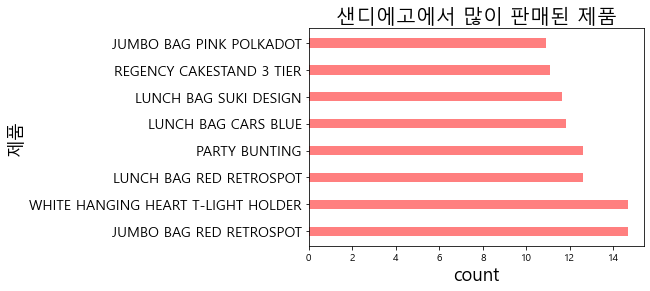

In [193]:
p2 = plt.barh(sddata['product'], sddata['pct_pd_count'],
             bar_width,
             color='r',
             alpha=alpha,
             label='San Diego')

plt.title('샌디에고에서 많이 판매된 제품', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [124]:
sddata= salesdata[salesdata['city']=='San Diego']
sddata

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,weekday,week
98,102,540014,21654,RIDGED GLASS FINGER BOWL,1,2021-01-04,1.45,E14606,1.45,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
99,103,540014,84499,BLACK FLOWER CANDLE PLATE,6,2021-01-04,0.85,E14606,5.10,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
100,104,540014,21661,VINTAGE GLASS TEA CADDY,1,2021-01-04,5.95,E14606,5.95,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
101,105,540014,21703,BAG 125g SWIRLY MARBLES,3,2021-01-04,0.42,E14606,1.26,San Diego,...,1429,844,middle,sightseeing,west,consignment,1,1,MON,1
102,106,540014,22274,FELTCRAFT DOLL EMILY,1,2021-01-04,2.95,E14606,2.95,San Diego,...,1429,844,middle,sightseeing,west,buying,1,1,MON,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245649,252224,581469,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2021-12-08,4.95,E14606,4.95,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49
245650,252225,581469,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",1,2021-12-08,3.95,E14606,3.95,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49
245651,252226,581469,21986,PACK OF 12 PINK POLKADOT TISSUES,1,2021-12-08,0.39,E14606,0.39,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49
245652,252227,581469,22087,PAPER BUNTING WHITE LACE,6,2021-12-08,2.95,E14606,17.70,San Diego,...,1429,844,middle,sightseeing,west,consignment,12,4,WED,49


In [126]:
sddata[['product_name','sales']]

,product_name,sales
98,RIDGED GLASS FINGER BOWL,1.45
99,BLACK FLOWER CANDLE PLATE,5.10
100,VINTAGE GLASS TEA CADDY,5.95
101,BAG 125g SWIRLY MARBLES,1.26
102,FELTCRAFT DOLL EMILY,2.95
...,...,...
245649,RETROSPOT HEART HOT WATER BOTTLE,4.95
245650,"DIAMANTE HEART SHAPED WALL MIRROR,",3.95
245651,PACK OF 12 PINK POLKADOT TISSUES,0.39
245652,PAPER BUNTING WHITE LACE,17.70


In [132]:
sdsale=sddata.groupby(['product_name'])['sales'].sum()
sdsale = pd.DataFrame(sdsale)
sdsale = sdsale.reset_index()

In [133]:
sdsale

,product_name,sales
0,10 COLOUR SPACEBOY PEN,294.10
1,12 COLOURED PARTY BALLOONS,13.65
2,12 DAISY PEGS IN WOOD BOX,80.85
3,12 EGG HOUSE PAINTED WOOD,38.25
4,12 IVORY ROSE PEG PLACE SETTINGS,152.50
...,...,...
2348,ZINC SWEETHEART WIRE LETTER RACK,138.75
2349,ZINC T-LIGHT HOLDER STAR LARGE,24.70
2350,ZINC T-LIGHT HOLDER STARS SMALL,44.82
2351,ZINC TOP 2 DOOR WOODEN SHELF,50.85


In [134]:
sdsale= sdsale.sort_values(by=['sales'])
sdsale = sdsale.reset_index(drop=True)
sdsale

,product_name,sales
0,FOOD/DRINK SPONGE STICKERS,0.21
1,STRIPY DESIGN SHOWER CAP,0.29
2,FOLK ART METAL HEART T-LIGHT HOLDER,0.38
3,CHRISTMAS HANGING STAR WITH BELL,0.39
4,LOCAL CAFE MUG,0.39
...,...,...
2348,VINTAGE UNION JACK BUNTING,1819.76
2349,SPOTTY BUNTING,1864.60
2350,WHITE HANGING HEART T-LIGHT HOLDER,2258.50
2351,REGENCY CAKESTAND 3 TIER,3189.45


In [136]:
sdsale = sdsale.tail(8)

In [137]:
sdsale['sales'].sum()

17392.07

In [138]:
sdsale['pct_sales']= sdsale['sales']/17392.07*100
sdsale

<ipython-input-138-a446cd8b29c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdsale['pct_sales']= sdsale['sales']/17392.07*100


,product_name,sales,pct_sales
2345,DOORMAT RED RETROSPOT,1438.20,8.269286
2346,PAPER BUNTING RETROSPOT,1542.15,8.866972
2347,JUMBO BAG RED RETROSPOT,1599.26,9.195340
2348,VINTAGE UNION JACK BUNTING,1819.76,10.463159
2349,SPOTTY BUNTING,1864.60,10.720978
2350,WHITE HANGING HEART T-LIGHT HOLDER,2258.50,12.985803
2351,REGENCY CAKESTAND 3 TIER,3189.45,18.338530
2352,PARTY BUNTING,3680.15,21.159931


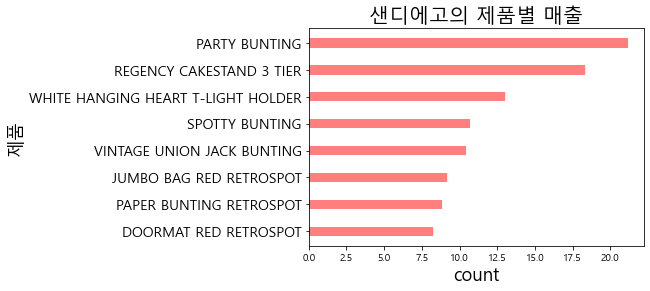

In [197]:
p3 = plt.barh(sdsale['product_name'], sdsale['pct_sales'],
             bar_width,
             color='r',
             alpha=alpha,
             label='San Diego')
plt.title('샌디에고의 제품별 매출', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

#매출총이익

In [140]:
hudata= salesdata[salesdata['city']=='Houston']
hudata

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,weekday,week
17,17,540001,21733,RED HANGING HEART T-LIGHT HOLDER,32,2021-01-04,2.55,E18097,81.60,Houston,...,2325,1658,middle,other,south,consignment,1,1,MON,1
18,18,540001,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,24,2021-01-04,2.95,E18097,70.80,Houston,...,2325,1658,middle,other,south,consignment,1,1,MON,1
19,19,540001,22060,LARGE CAKE STAND HANGING HEARTS,6,2021-01-04,9.95,E18097,59.70,Houston,...,2325,1658,middle,other,south,consignment,1,1,MON,1
20,20,540001,22151,PLACE SETTING WHITE HEART,48,2021-01-04,0.42,E18097,20.16,Houston,...,2325,1658,middle,other,south,consignment,1,1,MON,1
21,21,540001,22508,DOORSTOP RETROSPOT HEART,16,2021-01-04,3.39,E18097,54.24,Houston,...,2325,1658,middle,other,south,consignment,1,1,MON,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246073,252659,581571,23168,CLASSIC CAFE SUGAR DISPENSER,36,2021-12-09,1.04,E15311,37.44,Houston,...,2325,1658,middle,other,south,consignment,12,4,THU,49
246074,252661,581571,21314,SMALL GLASS HEART TRINKET POT,48,2021-12-09,1.85,E15311,88.80,Houston,...,2325,1658,middle,other,south,consignment,12,4,THU,49
246075,252662,581571,21137,BLACK RECORD COVER FRAME,24,2021-12-09,3.39,E15311,81.36,Houston,...,2325,1658,middle,other,south,consignment,12,4,THU,49
246076,252663,581571,44234,ASSORTED CIRCULAR MOBILE,1,2021-12-09,0.21,E15311,0.21,Houston,...,2325,1658,middle,other,south,consignment,12,4,THU,49


In [ ]:
hudata['product_name'].count()

In [141]:
hudata = hudata['product_name'].value_counts().head(8)
hudata = pd.DataFrame(hudata)
hudata

,product_name
WHITE HANGING HEART T-LIGHT HOLDER,107
ASSORTED COLOUR BIRD ORNAMENT,90
PARTY BUNTING,89
SET OF 3 CAKE TINS PANTRY DESIGN,73
REGENCY CAKESTAND 3 TIER,71
SET OF 4 PANTRY JELLY MOULDS,66
SET/5 RED RETROSPOT LID GLASS BOWLS,66
LUNCH BAG RED RETROSPOT,65


In [142]:
hudata = hudata.reset_index()
hudata.columns=['product','pd_count']
hudata

,product,pd_count
0,WHITE HANGING HEART T-LIGHT HOLDER,107
1,ASSORTED COLOUR BIRD ORNAMENT,90
2,PARTY BUNTING,89
3,SET OF 3 CAKE TINS PANTRY DESIGN,73
4,REGENCY CAKESTAND 3 TIER,71
5,SET OF 4 PANTRY JELLY MOULDS,66
6,SET/5 RED RETROSPOT LID GLASS BOWLS,66
7,LUNCH BAG RED RETROSPOT,65


In [143]:
hudata['pd_count'].sum()

627

In [144]:
hudata['pct_pd_count']= hudata['pd_count']/627*100
hudata

,product,pd_count,pct_pd_count
0,WHITE HANGING HEART T-LIGHT HOLDER,107,17.065391
1,ASSORTED COLOUR BIRD ORNAMENT,90,14.354067
2,PARTY BUNTING,89,14.194577
3,SET OF 3 CAKE TINS PANTRY DESIGN,73,11.642743
4,REGENCY CAKESTAND 3 TIER,71,11.323764
5,SET OF 4 PANTRY JELLY MOULDS,66,10.526316
6,SET/5 RED RETROSPOT LID GLASS BOWLS,66,10.526316
7,LUNCH BAG RED RETROSPOT,65,10.366826


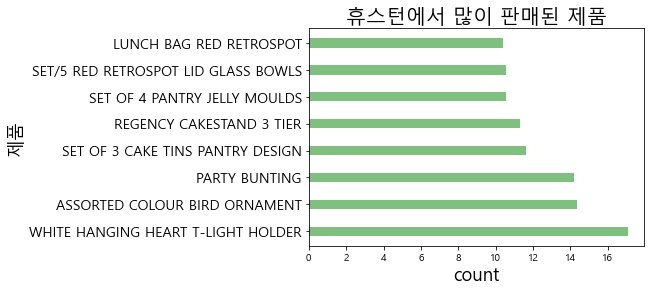

In [200]:
plt.barh(hudata['product'], hudata['pct_pd_count'],
             bar_width,
             color='g',
             alpha=alpha,
             label='Houston')
plt.title('휴스턴에서 많이 판매된 제품', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [147]:
alsale=salesdata.groupby(['product_name'])['sales'].sum()
alsale = pd.DataFrame(alsale)
alsale = alsale.reset_index()

In [148]:
alsale= alsale.sort_values(by=['sales'])
alsale = alsale.reset_index(drop=True)
alsale

,product_name,sales
0,PADS TO MATCH ALL CUSHIONS,0.003
1,ASSTD RASTA KEY-CHAINS,0.420
2,HEN HOUSE W CHICK IN NEST,0.420
3,HAND PAINTED HANGING EASTER EGG,0.840
4,HEN HOUSE WITH CHICK STANDING,0.840
...,...,...
3687,SPOTTY BUNTING,23580.000
3688,ASSORTED COLOUR BIRD ORNAMENT,24074.050
3689,WHITE HANGING HEART T-LIGHT HOLDER,37907.280
3690,PARTY BUNTING,44177.120


In [153]:
alsale = alsale.tail(8)

In [154]:
alsale['sales'].sum()

254633.3200000002

In [155]:
alsale['pct_sales']= alsale['sales']/254633.32*100
alsale

<ipython-input-155-fd64c4dc737d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alsale['pct_sales']= alsale['sales']/254633.32*100


,product_name,sales,pct_sales
3684,NATURAL SLATE HEART CHALKBOARD,16710.11,6.562421
3685,CHILLI LIGHTS,16958.53,6.659981
3686,JUMBO BAG RED RETROSPOT,21633.66,8.496005
3687,SPOTTY BUNTING,23580.00,9.260375
3688,ASSORTED COLOUR BIRD ORNAMENT,24074.05,9.454399
3689,WHITE HANGING HEART T-LIGHT HOLDER,37907.28,14.887007
3690,PARTY BUNTING,44177.12,17.349308
3691,REGENCY CAKESTAND 3 TIER,69592.57,27.330504


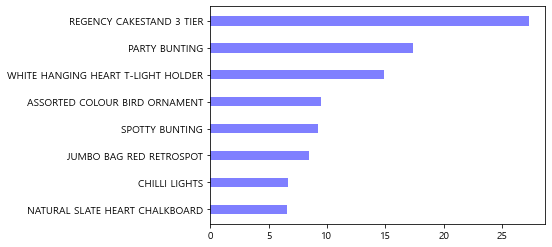

In [194]:
p3 = plt.barh(alsale['product_name'], alsale['pct_sales'],
             bar_width,
             color='b',
             alpha=alpha,
             label='All')
plt.title(' 제품', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [5]:
chdata= salesdata[salesdata['city']=='Chicago']
chdata

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,weekday,week
194,198,540017,22222,CAKE PLATE LOVEBIRD WHITE,12,2021-01-04,1.95,E13963,23.40,Chicago,...,2671,589,middle,metro,east,consignment,1,1,MON,1
195,199,540017,22342,HOME GARLAND PAINTED ZINC,24,2021-01-04,0.85,E13963,20.40,Chicago,...,2671,589,middle,metro,east,consignment,1,1,MON,1
196,200,540017,22343,PARTY PIZZA DISH RED RETROSPOT,24,2021-01-04,0.21,E13963,5.04,Chicago,...,2671,589,middle,metro,east,consignment,1,1,MON,1
197,201,540017,22473,TV DINNER TRAY VINTAGE PAISLEY,8,2021-01-04,1.95,E13963,15.60,Chicago,...,2671,589,middle,metro,east,consignment,1,1,MON,1
198,202,540017,22511,RETROSPOT BABUSHKA DOORSTOP,8,2021-01-04,1.25,E13963,10.00,Chicago,...,2671,589,middle,metro,east,consignment,1,1,MON,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246080,252667,581572,22624,IVORY KITCHEN SCALES,4,2021-12-09,8.50,E16705,34.00,Chicago,...,2671,589,middle,metro,east,consignment,12,4,THU,49
246081,252668,581572,23245,SET OF 3 REGENCY CAKE TINS,4,2021-12-09,4.95,E16705,19.80,Chicago,...,2671,589,middle,metro,east,consignment,12,4,THU,49
246141,252728,581583,20725,LUNCH BAG RED RETROSPOT,40,2021-12-09,1.45,E13777,58.00,Chicago,...,2671,589,middle,metro,east,consignment,12,4,THU,49
246142,252729,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2021-12-09,1.85,E13777,66.60,Chicago,...,2671,589,middle,metro,east,consignment,12,4,THU,49


In [6]:
chdata = chdata['product_name'].value_counts().head(8)
chdata = pd.DataFrame(chdata)
chdata

,product_name
WHITE HANGING HEART T-LIGHT HOLDER,175
REGENCY CAKESTAND 3 TIER,121
PARTY BUNTING,115
SET OF 3 CAKE TINS PANTRY DESIGN,112
JUMBO BAG RED RETROSPOT,100
WOODEN PICTURE FRAME WHITE FINISH,100
ASSORTED COLOUR BIRD ORNAMENT,90
LUNCH BAG RED RETROSPOT,88


In [8]:
chdata = chdata.reset_index()
chdata.columns=['product','pd_count']
chdata

,product,pd_count
0,WHITE HANGING HEART T-LIGHT HOLDER,175
1,REGENCY CAKESTAND 3 TIER,121
2,PARTY BUNTING,115
3,SET OF 3 CAKE TINS PANTRY DESIGN,112
4,JUMBO BAG RED RETROSPOT,100
5,WOODEN PICTURE FRAME WHITE FINISH,100
6,ASSORTED COLOUR BIRD ORNAMENT,90
7,LUNCH BAG RED RETROSPOT,88


In [9]:
chdata['pd_count'].sum()

901

In [11]:
chdata['pct_pd_count']= chdata['pd_count']/901*100
chdata

,product,pd_count,pct_pd_count
0,WHITE HANGING HEART T-LIGHT HOLDER,175,19.422863
1,REGENCY CAKESTAND 3 TIER,121,13.429523
2,PARTY BUNTING,115,12.763596
3,SET OF 3 CAKE TINS PANTRY DESIGN,112,12.430633
4,JUMBO BAG RED RETROSPOT,100,11.098779
5,WOODEN PICTURE FRAME WHITE FINISH,100,11.098779
6,ASSORTED COLOUR BIRD ORNAMENT,90,9.988901
7,LUNCH BAG RED RETROSPOT,88,9.766926


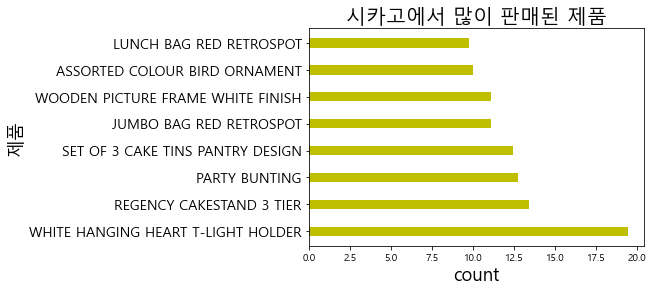

In [20]:
plt.barh(chdata['product'], chdata['pct_pd_count'], bar_width,
             color='y',
             label='Chicago')
plt.title('시카고에서 많이 판매된 제품', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [23]:
lvdata= salesdata[salesdata['city']=='Las Vegas']
lvdata

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,weekday,week
372,380,540027,82551,LAUNDRY 15C METAL SIGN,12,2021-01-04,1.45,E14210,17.40,Las Vegas,...,675,367,small,sightseeing,west,consignment,1,1,MON,1
373,381,540027,85150,LADIES & GENTLEMEN METAL SIGN,12,2021-01-04,2.55,E14210,30.60,Las Vegas,...,675,367,small,sightseeing,west,consignment,1,1,MON,1
374,382,540027,22116,METAL SIGN HIS DINNER IS SERVED,12,2021-01-04,0.85,E14210,10.20,Las Vegas,...,675,367,small,sightseeing,west,consignment,1,1,MON,1
375,383,540027,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",20,2021-01-04,0.42,E14210,8.40,Las Vegas,...,675,367,small,sightseeing,west,consignment,1,1,MON,1
376,384,540027,82613C,"METAL SIGN,CUPCAKE SINGLE HOOK",20,2021-01-04,0.42,E14210,8.40,Las Vegas,...,675,367,small,sightseeing,west,consignment,1,1,MON,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245274,251831,581426,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,7,2021-12-08,0.85,E17757,5.95,Las Vegas,...,675,367,small,sightseeing,west,consignment,12,4,WED,49
245275,251832,581426,22667,RECIPE BOX RETROSPOT,4,2021-12-08,2.95,E17757,11.80,Las Vegas,...,675,367,small,sightseeing,west,consignment,12,4,WED,49
245276,251833,581426,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,3,2021-12-08,2.95,E17757,8.85,Las Vegas,...,675,367,small,sightseeing,west,consignment,12,4,WED,49
245277,251834,581426,22138,BAKING SET 9 PIECE RETROSPOT,2,2021-12-08,4.95,E17757,9.90,Las Vegas,...,675,367,small,sightseeing,west,consignment,12,4,WED,49


In [24]:
lvdata = lvdata['product_name'].value_counts().head(8)
lvdata = pd.DataFrame(lvdata)
lvdata

,product_name
PARTY BUNTING,36
WHITE HANGING HEART T-LIGHT HOLDER,36
JUMBO BAG RED RETROSPOT,35
REGENCY CAKESTAND 3 TIER,34
ASSORTED COLOUR BIRD ORNAMENT,32
LUNCH BAG RED RETROSPOT,31
NATURAL SLATE HEART CHALKBOARD,29
HANGING HEART JAR T-LIGHT HOLDER,28


In [25]:
lvdata = lvdata.reset_index()
lvdata.columns=['product','pd_count']
lvdata

,product,pd_count
0,PARTY BUNTING,36
1,WHITE HANGING HEART T-LIGHT HOLDER,36
2,JUMBO BAG RED RETROSPOT,35
3,REGENCY CAKESTAND 3 TIER,34
4,ASSORTED COLOUR BIRD ORNAMENT,32
5,LUNCH BAG RED RETROSPOT,31
6,NATURAL SLATE HEART CHALKBOARD,29
7,HANGING HEART JAR T-LIGHT HOLDER,28


In [26]:
lvdata['pd_count'].sum()

261

In [27]:
lvdata['pct_pd_count']= lvdata['pd_count']/261*100
lvdata

,product,pd_count,pct_pd_count
0,PARTY BUNTING,36,13.793103
1,WHITE HANGING HEART T-LIGHT HOLDER,36,13.793103
2,JUMBO BAG RED RETROSPOT,35,13.409962
3,REGENCY CAKESTAND 3 TIER,34,13.026820
4,ASSORTED COLOUR BIRD ORNAMENT,32,12.260536
5,LUNCH BAG RED RETROSPOT,31,11.877395
6,NATURAL SLATE HEART CHALKBOARD,29,11.111111
7,HANGING HEART JAR T-LIGHT HOLDER,28,10.727969


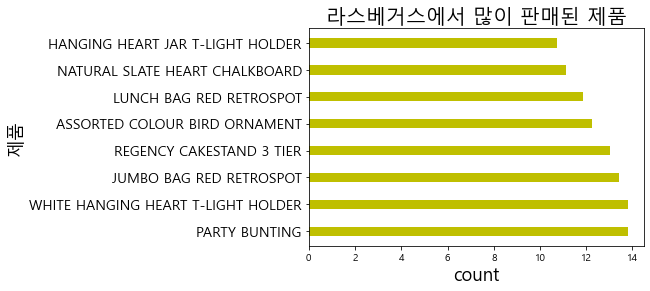

In [28]:
plt.barh(lvdata['product'], lvdata['pct_pd_count'], bar_width,
             color='y',
             label='Chicago')
plt.title('라스베거스에서 많이 판매된 제품', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [62]:

sdgraph = { 'category':['Lunch Boxes & Bags','Home & Kitchen','Party Decorations','Others'], 'Pct':[48.9,25,12,14.1]}

In [63]:
sdgraph= pd.DataFrame(sdgraph)
sdgraph


,category,Pct
0,Lunch Boxes & Bags,48.9
1,Home & Kitchen,25.0
2,Party Decorations,12.0
3,Others,14.1


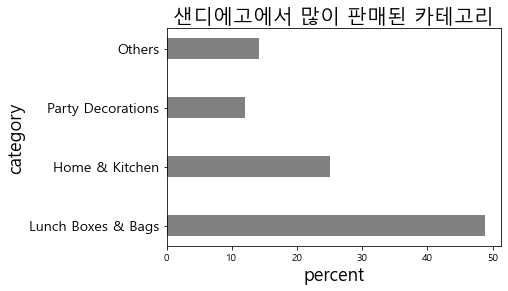

In [64]:
plt.barh(sdgraph['category'], sdgraph['Pct'], bar_width,
             color='grey',
             label='San Diego')
plt.title('샌디에고에서 많이 판매된 카테고리', fontsize=20)
plt.ylabel('category', fontsize=18)
plt.xlabel('percent', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [67]:

chgraph = { 'category':['Home & Kitchen','Lunch Boxes & Bags','Party Decorations','Others'], 'Pct':[66,20,12,2]}

In [68]:
chgraph= pd.DataFrame(chgraph)
chgraph


,category,Pct
0,Home & Kitchen,66
1,Lunch Boxes & Bags,20
2,Party Decorations,12
3,Others,2


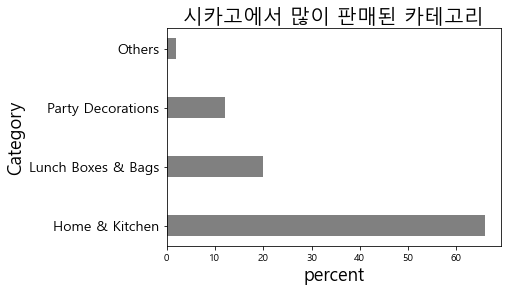

In [69]:
plt.barh(chgraph['category'], chgraph['Pct'], bar_width,
             color='grey',
             label='San Diego')
plt.title('시카고에서 많이 판매된 카테고리', fontsize=20)
plt.ylabel('Category', fontsize=18)
plt.xlabel('percent', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
0	WHITE HANGING HEART T-LIGHT HOLDER	107	17.065391
1	ASSORTED COLOUR BIRD ORNAMENT	90	14.354067
4	REGENCY CAKESTAND 3 TIER	71	11.323764
5	SET OF 4 PANTRY JELLY MOULDS	66	10.526316
6	SET/5 RED RETROSPOT LID GLASS BOWLS	66	10.526316
가방 :10
파티 :25
인테리어:63
Kitchenware

In [44]:
hugraph = { 'category':['Interior','Party','Bag','Other'], 'Pct':[63,25,10,2]}

In [45]:
hugraph= pd.DataFrame(hugraph)
hugraph


,category,Pct
0,Interior,63
1,Party,25
2,Bag,10
3,Other,2


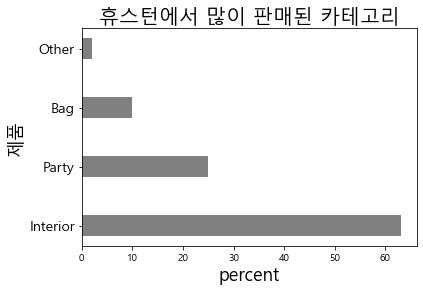

In [48]:
plt.barh(hugraph['category'], hugraph['Pct'], bar_width,
             color='grey',
             label='San Diego')
plt.title('휴스턴에서 많이 판매된 카테고리', fontsize=20)
plt.ylabel('제품', fontsize=18)
plt.xlabel('percent', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [54]:
abc= pd.read_csv('assco_cate.csv')

In [55]:
abc= pd.DataFrame(abc)

In [56]:
abc

,Unnamed: 0,lhs,rhs,confidence,lift,support
0,0,frozenset({'Arts'}),frozenset({'Arts & Crafts Supplies'}),0.162096,2.129937,0.038982
1,1,frozenset({'Arts & Crafts Supplies'}),frozenset({'Arts'}),0.512222,2.129937,0.038982
2,0,frozenset({'Arts'}),frozenset({'Bakeware'}),0.407525,1.481065,0.098004
3,1,frozenset({'Bakeware'}),frozenset({'Arts'}),0.356177,1.481065,0.098004
4,0,frozenset({'Arts'}),frozenset({'Baking Tools & Accessories'}),0.172293,1.744462,0.041434
...,...,...,...,...,...,...
1400,1,frozenset({'Womens Fashion'}),frozenset({'Toys & Games'}),0.610390,1.442251,0.071537
1401,0,frozenset({'Toys & Games'}),frozenset({'Womens Handbags'}),0.131868,1.531898,0.055809
1402,1,frozenset({'Womens Handbags'}),frozenset({'Toys & Games'}),0.648330,1.531898,0.055809
1403,0,frozenset({'Womens Fashion'}),frozenset({'Womens Handbags'}),0.259740,3.017376,0.030441


In [ ]:
#B1편도훈